## 1. Import Libraries and Packages

In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Dataset

In [2]:
df = pd.read_csv('C:/Users/abc/OneDrive/Desktop/File Transfer/Projects/Cognifyz Internship/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Next we will be going through the dataset and other relevant information

In [3]:
print(df.head())
print(df.info())
print(df.describe())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
print(df.columns)
print(df.dtypes)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color       

Handling Missing values

In [5]:
df.fillna({
    'Latitude': df['Latitude'].mean(),
    'Longitude': df['Longitude'].mean(),
    'Aggregate rating': df['Aggregate rating'].mean(),
    'Cuisines': 'Unknown',
    'Price range': 'Unknown',
    'City': 'Unknown'
}, inplace=True)

Now we will a map on a local host so that we can view thr restaurants just like in a map

In [6]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

In [7]:
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']}, {row['Cuisines']}, {row['Price range']}, Rating: {row['Aggregate rating']}"
    ).add_to(restaurant_map)

The map must now be saved 

In [8]:
restaurant_map.save('restaurant_map.html')

In [9]:
city_group = df.groupby('City')

In [10]:
def safe_mode(series):
    try:
        return series.mode()[0]
    except IndexError:
        return None

## 3. Feature Selection

In [11]:
city_stats = city_group.agg({
    'Aggregate rating': 'mean',
    'Restaurant Name': 'count',
    'Cuisines': lambda x: x.mode()[0],
    'Price range': lambda x: x.mode()[0]
}).rename(columns={'Restaurant Name': 'restaurant_count', 'Aggregate rating': 'average_rating'})

## 4. Model Training

Here the trained model gives outputs to a location based analysis that we did.

In [12]:
city_stats['average_price_range'] = city_group['Price range'].apply(lambda x: x.mode()[0])
city_stats['common_cuisine'] = city_group['Cuisines'].apply(lambda x: x.mode()[0])


top_cities = city_stats.sort_values('restaurant_count', ascending=False).head(10)
print(f"Top 10 cities with highest concentration of restaurants:\n{top_cities}")

top_rated_cities = city_stats.sort_values('average_rating', ascending=False).head(10)
print(f"Top 10 cities with highest average ratings:\n{top_rated_cities}")

common_cuisines = city_stats['common_cuisine'].value_counts().head(10)
print(f"Most common cuisines:\n{common_cuisines}")

Top 10 cities with highest concentration of restaurants:
              average_rating  restaurant_count  \
City                                             
New Delhi           2.438845              5473   
Gurgaon             2.651431              1118   
Noida               2.036204              1080   
Faridabad           1.866932               251   
Ghaziabad           2.852000                25   
Bhubaneshwar        3.980952                21   
Lucknow             4.195238                21   
Amritsar            3.685714                21   
Ahmedabad           4.161905                21   
Guwahati            4.190476                21   

                                                      Cuisines  Price range  \
City                                                                          
New Delhi                                         North Indian            1   
Gurgaon                                           North Indian            1   
Noida                     

# 5. Data Visualization

# a) Top 10 cities with the highest concentration of restaurants

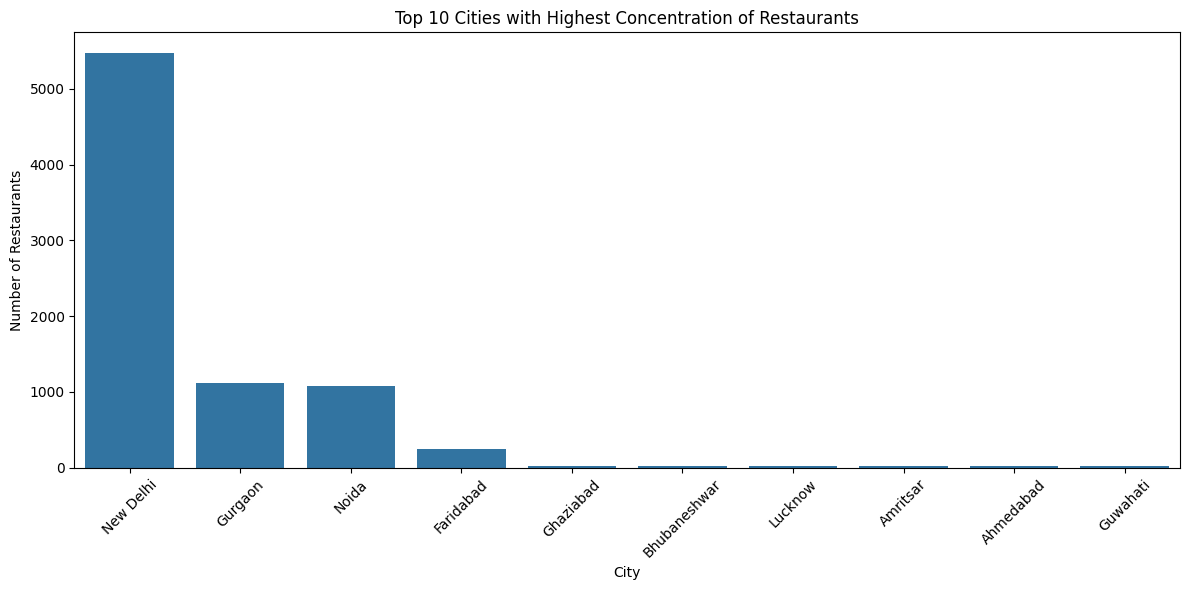

In [13]:

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities['restaurant_count'])
plt.title('Top 10 Cities with Highest Concentration of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# b) Top 10 Cities with Highest Average Ratings

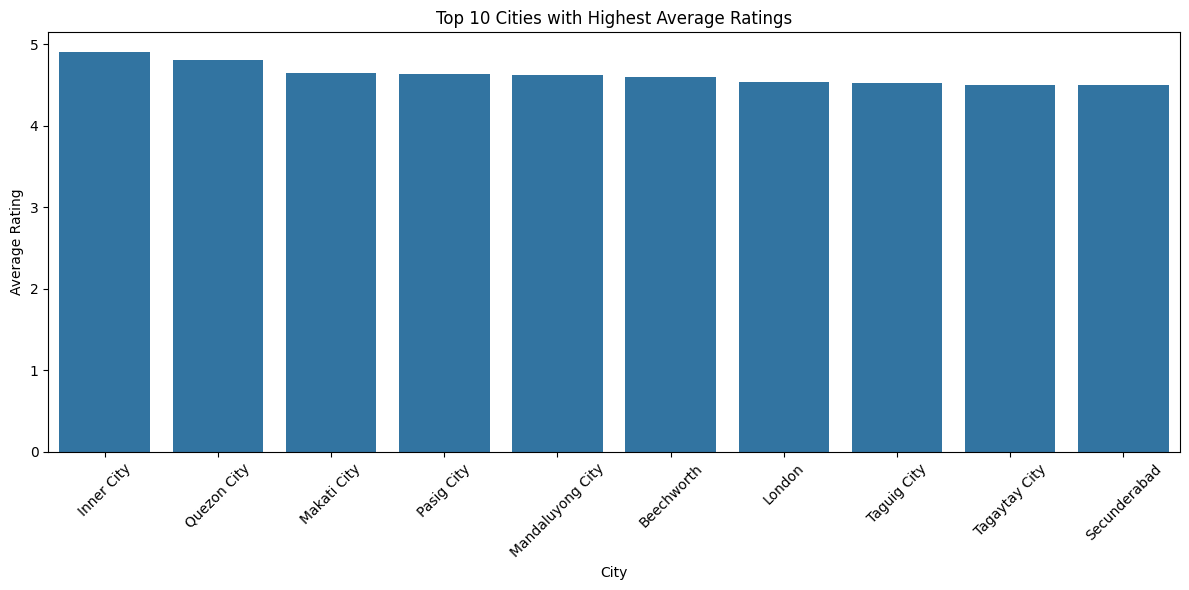

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_cities.index, y=top_rated_cities['average_rating'])
plt.title('Top 10 Cities with Highest Average Ratings')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# c) Restaurant count by Price Range

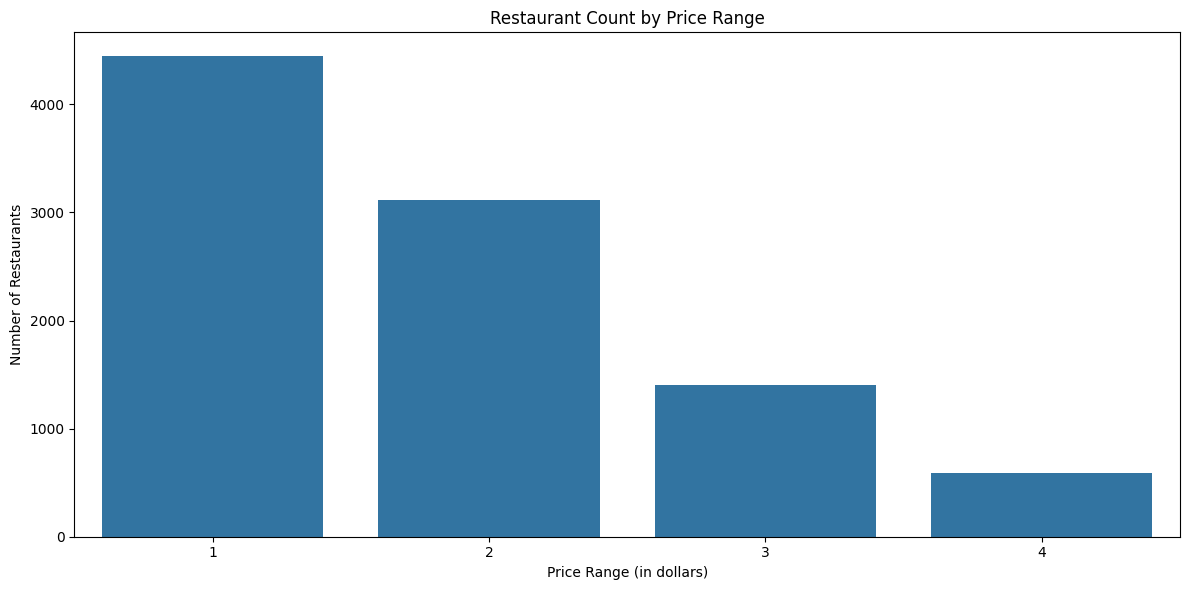

In [15]:
plt.figure(figsize=(12, 6))
price_range_counts = df['Price range'].value_counts()
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.title('Restaurant Count by Price Range')
plt.xlabel('Price Range (in dollars)')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()